In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# for EDA
from pandas_profiling import ProfileReport

In [2]:
train = pd.read_csv('/Users/kimginam/Kaggle/DATA/Jeju_bus_prediction/train.csv')

In [3]:
test = pd.read_csv('/Users/kimginam/Kaggle/DATA/Jeju_bus_prediction/test.csv')

In [4]:
train

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38


In [5]:
a = train[train['next_station'] == '전경대 입구'].index
a

Int64Index([26367, 84871, 84981, 101966, 131735, 132903, 176264], dtype='int64')

In [6]:
train.drop(a, inplace=True)

In [7]:
c = train[train['now_arrive_time'] == '00시'].index
c

Int64Index([147641, 147642, 147643, 147644, 147645], dtype='int64')

In [8]:
train.drop(c, inplace=True)

In [9]:
test['now_station'] = test['now_station'].replace('제주한라대학교(종점)', '노형오거리')

In [10]:
import geopy.distance

In [11]:
dist = [geopy.distance.vincenty((i, j), (k, l)).km for i, j, k, l in

        list(zip(train['now_latitude'], train['now_longitude'], train['next_latitude'], train['next_longitude']))]

train['dist_line'] = dist

dist = [geopy.distance.vincenty((i, j), (k, l)).km for i, j, k, l in

        list(zip(test['now_latitude'], test['now_longitude'], test['next_latitude'], test['next_longitude']))]

test['dist_line'] = dist

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  import sys


In [12]:
dist = [geopy.distance.vincenty((i, j), (k, l)).km for i, j, k, l in
        list(zip(train['now_latitude'], train['now_longitude'], train['next_latitude'], train['next_longitude']))]
train['dist_line'] = dist

dist = [geopy.distance.vincenty((i, j), (k, l)).km for i, j, k, l in
        list(zip(test['now_latitude'], test['now_longitude'], test['next_latitude'], test['next_longitude']))]
test['dist_line'] = dist

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  """


In [13]:
train.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,dist_line
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24,0.265361
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,0.331896
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40,0.415706
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,0.577617
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,0.374588


In [14]:
train['next_arrive_time'].describe()

count    210445.000000
mean         85.381045
std          85.053132
min           6.000000
25%          44.000000
50%          66.000000
75%         102.000000
max        2996.000000
Name: next_arrive_time, dtype: float64

In [15]:
corr = train.corr()
corr['next_arrive_time'].sort_values(ascending=False)

next_arrive_time    1.000000
distance            0.437175
dist_line           0.413886
vh_id               0.161961
next_latitude       0.103379
now_latitude        0.101329
id                 -0.010415
next_longitude     -0.115163
now_longitude      -0.115291
route_id           -0.157624
Name: next_arrive_time, dtype: float64

In [16]:
train['arrival_time_min'] = train['next_arrive_time']/60

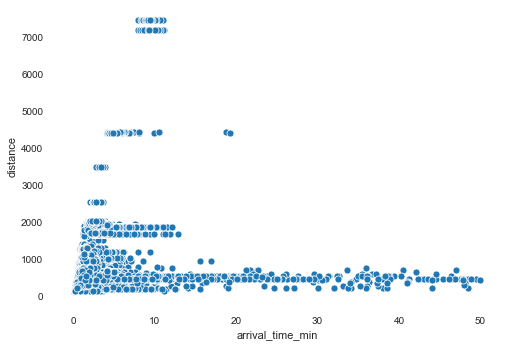

In [17]:
sns.scatterplot(x=train.arrival_time_min, y=train.distance)

In [18]:
train

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,dist_line,arrival_time_min
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24,0.265361,0.400000
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,0.331896,0.600000
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40,0.415706,0.666667
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,0.577617,0.700000
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,0.374588,1.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96,0.515489,1.600000
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50,0.271597,0.833333
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16,0.113673,0.266667
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38,0.223174,0.633333


In [19]:
q = train[(train['arrival_time_min'] >= 30) & (train['distance'] <1000)].index
q

Int64Index([  1785,   2003,   2752,   3100,   3487,   4563,   4797,  18648,
             18893,  19236,  19864,  20340,  30842,  33053,  34225,  34404,
             34592,  34763,  35950,  45508,  45511,  45513,  49272,  50606,
             51100,  52103,  53461,  62004,  66194,  66462,  76849,  78568,
             80094,  87813,  90946,  93990,  95465, 101459, 107827, 110341,
            110733, 111123, 111189, 112140, 124702, 125359, 125381, 125929,
            127314, 134244, 139515, 139754, 140101, 140312, 140969, 141073,
            141694, 141728, 150855, 152773, 152911, 155441, 155666, 156477,
            156576, 157456, 157587, 158593, 170888, 182501, 183800, 184859,
            185245, 195677, 197875, 198022, 198197, 198570, 198785, 199070,
            199818, 201187],
           dtype='int64')

In [20]:
train.drop(q, inplace=True)

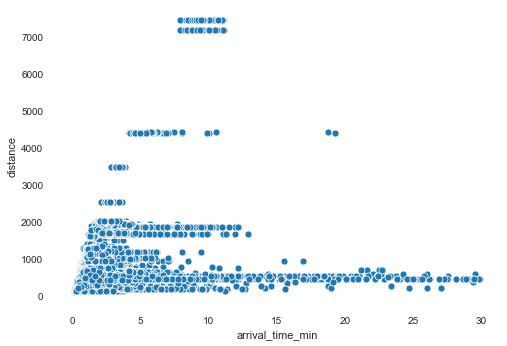

In [21]:
sns.scatterplot(y=train.distance, x=train.arrival_time_min)

In [22]:
up = (33.506286, 126.490312)

right = (33.493521, 126.895326)

center = (33.379724, 126.545315)

t1 = [geopy.distance.vincenty((i, j), up).km for i, j in list(zip(train['now_latitude'], train['now_longitude']))]

t3 = [geopy.distance.vincenty((i, j), right).km for i, j in list(zip(train['now_latitude'], train['now_longitude']))]

t4 = [geopy.distance.vincenty((i, j), center).km for i, j in list(zip(train['now_latitude'], train['now_longitude']))]

total = pd.DataFrame(list(zip(t1, t3, t4)), columns=['up', 'right', 'center'])

train['dist_name'] = total.apply(lambda x: x.argmin(), axis=1)

t1 = [geopy.distance.vincenty((i, j), up).km for i, j in list(zip(test['now_latitude'], test['now_longitude']))]

t3 = [geopy.distance.vincenty((i, j), right).km for i, j in list(zip(test['now_latitude'], test['now_longitude']))]

t4 = [geopy.distance.vincenty((i, j), center).km for i, j in list(zip(test['now_latitude'], test['now_longitude']))]

total = pd.DataFrame(list(zip(t1, t3, t4)), columns=['up', 'right', 'center'])

test['dist_name'] = total.apply(lambda x: x.argmin(), axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.

In [23]:
train

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,dist_line,arrival_time_min,dist_name
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24,0.265361,0.400000,0.0
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,0.331896,0.600000,0.0
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40,0.415706,0.666667,0.0
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,0.577617,0.700000,0.0
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,0.374588,1.066667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96,0.515489,1.600000,NaN
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50,0.271597,0.833333,NaN
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16,0.113673,0.266667,NaN
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38,0.223174,0.633333,NaN


In [24]:
train

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,dist_line,arrival_time_min,dist_name
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24,0.265361,0.400000,0.0
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,0.331896,0.600000,0.0
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40,0.415706,0.666667,0.0
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,0.577617,0.700000,0.0
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,0.374588,1.066667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96,0.515489,1.600000,NaN
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50,0.271597,0.833333,NaN
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16,0.113673,0.266667,NaN
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38,0.223174,0.633333,NaN


In [25]:
train = train.drop(['now_latitude', 'now_longitude', 'next_latitude', 'next_longitude', 'id', 'date', 'route_id'
                   , 'vh_id', 'route_nm','arrival_time_min'], axis=1)

In [26]:
test = test.drop(['now_latitude', 'now_longitude', 'next_latitude', 'next_longitude', 'id', 'date', 'route_id'
                   , 'vh_id', 'route_nm'], axis=1)

In [27]:
train

,now_station,now_arrive_time,distance,next_station,next_arrive_time,dist_line,dist_name
0,제주대학교입구,06시,266.0,제대마을,24,0.265361,0.0
1,제대마을,06시,333.0,제대아파트,36,0.331896,0.0
2,제대아파트,06시,415.0,제주대학교,40,0.415706,0.0
3,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),42,0.577617,0.0
4,도호동,07시,374.0,은남동,64,0.374588,0.0
...,...,...,...,...,...,...,...
210452,비석거리,21시,528.0,삼아아파트,96,0.515489,NaN
210453,동문로터리,21시,280.0,매일올레시장 7번입구,50,0.271597,NaN
210454,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,16,0.113673,NaN
210455,아랑조을거리 입구,21시,223.0,평생학습관,38,0.223174,NaN


In [28]:
test

,now_station,now_arrive_time,distance,next_station,dist_line,dist_name
0,제대마을,07시,333.0,제대아파트,0.331896,0
1,제대아파트,07시,415.0,제주대학교,0.415706,0
2,한라중학교/부영아파트,08시,417.0,대림2차아파트,0.419837,0
3,대림2차아파트,08시,334.0,연동대림1차아파트,0.252488,0
4,연동대림1차아파트,08시,550.0,케이티앤지,0.452070,0
...,...,...,...,...,...,...
91769,제주지방법원(광양방면),20시,272.0,고산동산(광양방면),0.273666,0
91770,고산동산(광양방면),20시,447.0,제주시청(광양방면),0.444265,0
91771,제주시청(광양방면),20시,418.0,광양사거리,0.347232,0
91772,광양사거리,20시,140.0,탐라장애인 종합복지관,0.140001,0
